In [1]:
import cv2
import pyautogui
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
# https://www.minijuegos.com/juego/spot-the-difference-seasons

In [5]:
screen = pyautogui.screenshot()
# Convert the output to a numpy array
screen_array = np.array(screen)
# Crop out the region we want - height, width, channels 
cropped_region = screen_array[450:1000, 20:920, :]

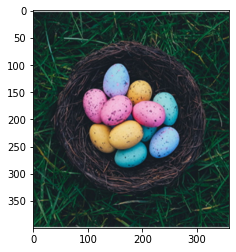

In [6]:
# centrar la imagen primera
offset = 0
image_dims_up = 515+offset
image_dims_down = 915+offset
image_dims_left = 60
image_dims_right = 420
original = screen_array[image_dims_up:image_dims_down, image_dims_left:image_dims_right, :]
plt.imshow(original);

1896


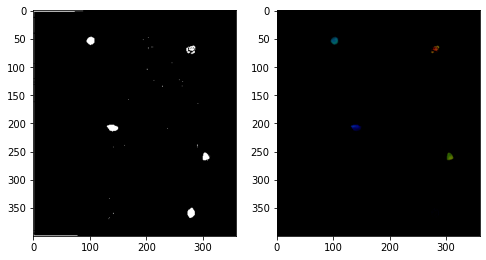

In [120]:
screen = pyautogui.screenshot()
# Convert the output to a numpy array
screen_array = np.array(screen)

# si sale raro variar i entre 6 o 7
# compute difference
offset = 0
original = screen_array[515+offset:915+offset, 60:420, :]
i=6
copy = screen_array[515+offset:915+offset, 490-i:850-i, :]
difference1 = cv2.subtract(original, copy)
difference2 = cv2.subtract(copy, original)

# color the mask red
Conv_hsv_Gray1 = cv2.cvtColor(difference1, cv2.COLOR_BGR2GRAY)
_, mask1 = cv2.threshold(Conv_hsv_Gray1, 0, 255,cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)

# color the mask red
Conv_hsv_Gray2 = cv2.cvtColor(difference2, cv2.COLOR_BGR2GRAY)
_, mask2 = cv2.threshold(Conv_hsv_Gray2, 0, 255,cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)

# hay que binarizar las mascara TODO
mask = mask1 + mask2
binary_mask = np.ma.mask_or(mask1 < 255, mask2 < 255)

print(binary_mask.sum())

if binary_mask.sum() > 8000:
    print("CHANGE THE copy", binary_mask.sum())

#difference2[binary_mask] = [0, 0, 255]

fig=plt.figure(figsize=(8,10))
ax=fig.add_subplot(1,2, 1)  
plt.imshow(binary_mask, cmap="gray");
ax=fig.add_subplot(1,2, 2)  
plt.imshow((difference2 * np.stack((binary_mask,binary_mask,binary_mask),axis=2)).clip(0, 255).astype(np.uint8));

In [121]:
num_component, component = cv2.connectedComponents(binary_mask.astype(np.uint8))
num_component

33

In [ ]:
https://medium.com/@jaredchilders_38839/k-means-clustering-algorithm-4334db89bdf3

In [162]:
# group the dots?
# number of clusters (K)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)

kmeans.fit(binary_mask)

KMeans(n_clusters=5)

In [67]:
binary_mask.shape

(400, 360)

In [163]:
x = []
y = []

filtered_mask = sum(diffs)

for i in range(filtered_mask.shape[0] - 4):  # quitar falsos positivos
    for j in range(filtered_mask.shape[1]):
        if filtered_mask[i][j]:
            x.append(i)
            y.append(j)

569
569


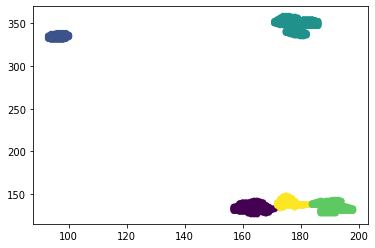

In [164]:
from sklearn import cluster
kmeans = cluster.KMeans(5)

clustered = kmeans.fit_predict(list(zip(x, y)))
print(len(x))
print(len(clustered))

plt.scatter(x, y, c=clustered);

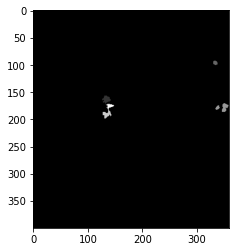

In [165]:
kmeans_mask = np.zeros(binary_mask.shape, dtype=int)

for coord in range(len(x)):
    kmeans_mask[x[coord]][y[coord]] = clustered[coord] + 1

plt.imshow(kmeans_mask, cmap="gray");

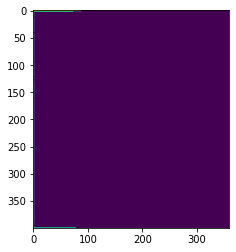

In [142]:
plt.imshow((component == 1));

In [154]:
(component == 1)[200:204, :]

array([[ True,  True, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False]])

In [140]:
(component == 1)[5:-5, :].shape

(390, 360)

In [132]:
component.shape

(400, 360)

In [161]:
# extract them by fixed minimun size
diffs = []
sizes = []
for i in range(1,num_component ):
    component_i = (component == i)
    size = component_i[4:-4, 4:-4].sum()
    sizes.append(size)
    print(i, size) # se quitan los 4 pixeles superiores para evitar falsos positivos 
    if 40 <= size:
        diffs.append(component_i)
print("\nBiggests fixed: {}".format(len(diffs)))

1 2
2 52
3 25
4 144
5 112
6 204
7 11
8 42
9 4
10 21
11 35

Biggests fixed: 5


In [97]:
# get the top 5 by size
print("Top 5 biggest index ", sorted(range(len(sizes)), key=lambda i: sizes[i])[-5:])
diffs = []
for i in sorted(range(len(sizes)), key=lambda i: sizes[i])[-5:]:
    component_i = (component == i+1)
    print(component_i[4:, :].sum())
    diffs.append(component_i)

Top 5 biggest index  [8, 10, 1, 0, 19]
81
165
167
270
342


In [98]:
points = []
for area in diffs:
    count = (area == 1).sum()
    y_center, x_center = np.argwhere(area==1).sum(0)/count
    points.append((x_center, y_center,))
points

[(172.679012345679, 153.93827160493828),
 (310.72727272727275, 163.43636363636364),
 (253.32934131736528, 61.43712574850299),
 (98.41481481481482, 49.25185185185185),
 (132.85087719298247, 291.6374269005848)]

In [99]:
# hay que clickar en los puntos:
sleep(4)
for p in points:
    sleep(1)
    pyautogui.click(x=image_dims_left + p[0], y= image_dims_up + p[1])
    print(pyautogui.position())
    #€pyautogui.moveTo(100, 150)

Point(x=232, y=668)
Point(x=370, y=678)
Point(x=313, y=576)
Point(x=158, y=564)
Point(x=192, y=806)


In [15]:
location = pyautogui.locateOnScreen('next.png')
print(location)

None


In [101]:
sleep(2)
location = pyautogui.locateOnScreen('next.png')
# location[0] is the top left x coord
# location[1] is the top left y coord
# location[2] is the distance from left x coord to right x coord
# location[3] is the distance from top y coord to bottom y coord
if not location:
    print("not next button found!")
    location = pyautogui.locateOnScreen('menu.png')

print(location)

pyautogui.click(location)
sleep(0.3)
pyautogui.click(location)

not next button found!
Box(left=382, top=728, width=56, height=63)


# all in one

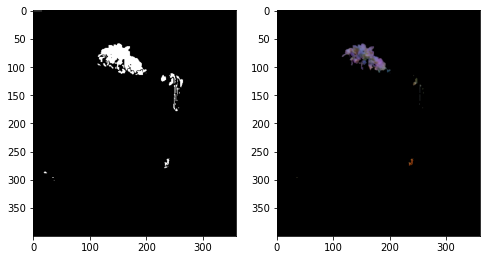

Num com: 32

Biggests fixed: 8
Top 5 biggest index  [9, 10, 15, 11, 1]
70
74
75
81
2152
Point(x=307, y=632)
Point(x=290, y=635)
Point(x=311, y=675)
Point(x=320, y=640)
Point(x=217, y=600)
not next button found!
not menu button found!


In [194]:
sleep(4)
screen = pyautogui.screenshot()
# Convert the output to a numpy array
screen_array = np.array(screen)

# si sale raro variar i entre 6 o 7
# compute difference
offset = 0
original = screen_array[515+offset:915+offset, 60:420, :]

# option1:
i=6
copy = screen_array[515+offset:915+offset, 490-i:850-i, :]
difference1 = cv2.subtract(original, copy)
difference2 = cv2.subtract(copy, original)

# color the mask red
Conv_hsv_Gray1 = cv2.cvtColor(difference1, cv2.COLOR_BGR2GRAY)
_, mask1 = cv2.threshold(Conv_hsv_Gray1, 0, 255,cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)

# color the mask red
Conv_hsv_Gray2 = cv2.cvtColor(difference2, cv2.COLOR_BGR2GRAY)
_, mask2 = cv2.threshold(Conv_hsv_Gray2, 0, 255,cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)

# hay que binarizar las mascara TODO
mask = mask1 + mask2
binary_mask = np.ma.mask_or(mask1 < 255, mask2 < 255)


# option2:
i=7
copy_v2 = screen_array[515+offset:915+offset, 490-i:850-i, :]
difference1_v2 = cv2.subtract(original, copy_v2)
difference2_v2 = cv2.subtract(copy_v2, original)

# color the mask red
_, mask1_v2 = cv2.threshold(cv2.cvtColor(difference1_v2, cv2.COLOR_BGR2GRAY), 0, 255,cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)

# color the mask red
_, mask2_v2 = cv2.threshold(cv2.cvtColor(difference2_v2, cv2.COLOR_BGR2GRAY), 0, 255,cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)

# hay que binarizar las mascara TODO
mask_v2 = mask1_v2 + mask2_v2
binary_mask_v2 = np.ma.mask_or(mask1_v2 < 255, mask2_v2 < 255)

if binary_mask.sum() > binary_mask_v2.sum():
    print("CHANGE THE copy", binary_mask.sum(), "to ", binary_mask_v2.sum())
    binary_mask = binary_mask_v2
    difference2 = difference2_v2

#difference2[binary_mask] = [0, 0, 255]

fig=plt.figure(figsize=(8,10))
ax=fig.add_subplot(1,2, 1)  
plt.imshow(binary_mask, cmap="gray");
ax=fig.add_subplot(1,2, 2)  
plt.imshow((difference2 * np.stack((binary_mask,binary_mask,binary_mask),axis=2)).clip(0, 255).astype(np.uint8));
plt.show()

num_component, component = cv2.connectedComponents(binary_mask.astype(np.uint8))
print("Num com:", num_component)


# extract them by fixed minimun size
diffs = []
sizes = []
for i in range(1,num_component ):
    component_i = (component == i)
    size = component_i[4:-4, 4:-4].sum()
    sizes.append(size)
    if 40 <= size:
        diffs.append(component_i)
print("\nBiggests fixed: {}".format(len(diffs)))

print("Top 5 biggest index ", sorted(range(len(sizes)), key=lambda i: sizes[i])[-5:])
diffs = []
for i in sorted(range(len(sizes)), key=lambda i: sizes[i])[-5:]:
    component_i = (component == i+1)
    print(component_i[4:-4, 4:-4].sum())
    diffs.append(component_i)

points = []
for area in diffs:
    count = (area == 1).sum()
    y_center, x_center = np.argwhere(area==1).sum(0)/count
    points.append((x_center, y_center,))
points


# hay que clickar en los puntos:
sleep(0.5)
for p in points:
    sleep(0.6)
    pyautogui.click(x=image_dims_left + p[0], y= image_dims_up + p[1])
    print(pyautogui.position())


sleep(5)
location = pyautogui.locateOnScreen('next.png')

if not location:
    print("not next button found!")
    location = pyautogui.locateOnScreen('menu.png')

if not location:
    print("not menu button found!")
else:
    pyautogui.click(location)

# internal testing

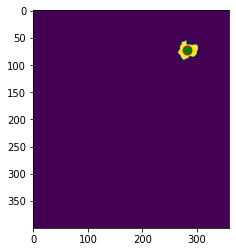

In [28]:
# verificación de crentroide de mascara

x = [73]
y = [283]
plt.plot(y, x, marker="o", markersize=9, markeredgecolor="red", markerfacecolor="green")
plt.imshow(diffs[0]);
plt.show()

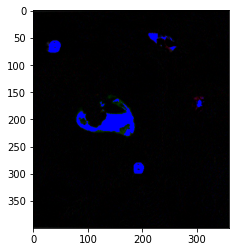

In [217]:
screen = pyautogui.screenshot()
# Convert the output to a numpy array
screen_array = np.array(screen)

# compute difference
offset = -80
original = screen_array[515+offset:915+offset, 60:420, :]
i=6
copy = screen_array[515+offset:915+offset, 490-i:850-i, :]
difference = cv2.subtract(original, copy)

# color the mask red
Conv_hsv_Gray = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(Conv_hsv_Gray, 0, 255,cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)
difference[mask != 255] = [0, 0, 255]

plt.imshow(difference);

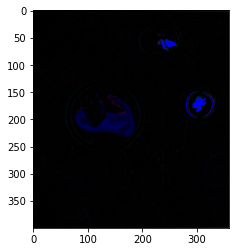

In [213]:
screen = pyautogui.screenshot()
# Convert the output to a numpy array
screen_array = np.array(screen)

# compute difference
offset = -80
original = screen_array[515+offset:915+offset, 60:420, :]
i=6
copy = screen_array[515+offset:915+offset, 490-i:850-i, :]
difference = cv2.subtract(copy, original)

# color the mask red
Conv_hsv_Gray = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(Conv_hsv_Gray, 0, 255,cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)
difference[mask != 255] = [0, 0, 255]

plt.imshow(difference);

In [51]:
cv2.imshow('Game_Cap', cropped_region)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
cropped_region.shape

(580, 805, 3)

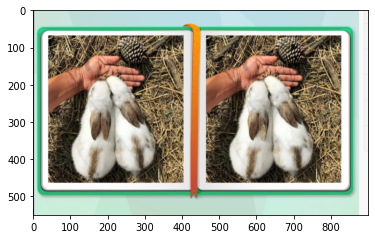

In [39]:
plt.imshow(cropped_region);

(400, 360, 3)


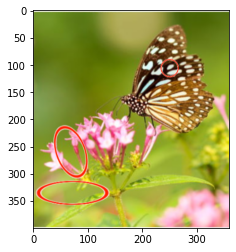

In [172]:
# Two halves:
#original = screen_array[515:915, 60:420, :]
offset = -80
original = screen_array[515+offset:915+offset, 60:420, :]
print(original.shape)
plt.imshow(original);

(400, 360, 3)


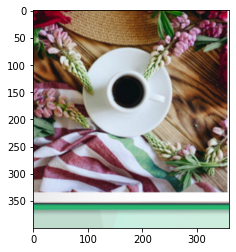

In [154]:
copy = screen_array[515:915, 490:850, :]
print(copy.shape)
plt.imshow(copy);

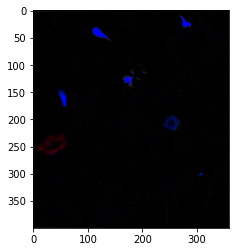

In [146]:
# compute difference
offset = -80
original = screen_array[515+offset:915+offset, 60:420, :]
i=6
copy = screen_array[515+offset:915+offset, 490-i:850-i, :]
difference = cv2.subtract(original, copy)

# color the mask red
Conv_hsv_Gray = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(Conv_hsv_Gray, 0, 255,cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)
difference[mask != 255] = [0, 0, 255]

plt.imshow(difference);

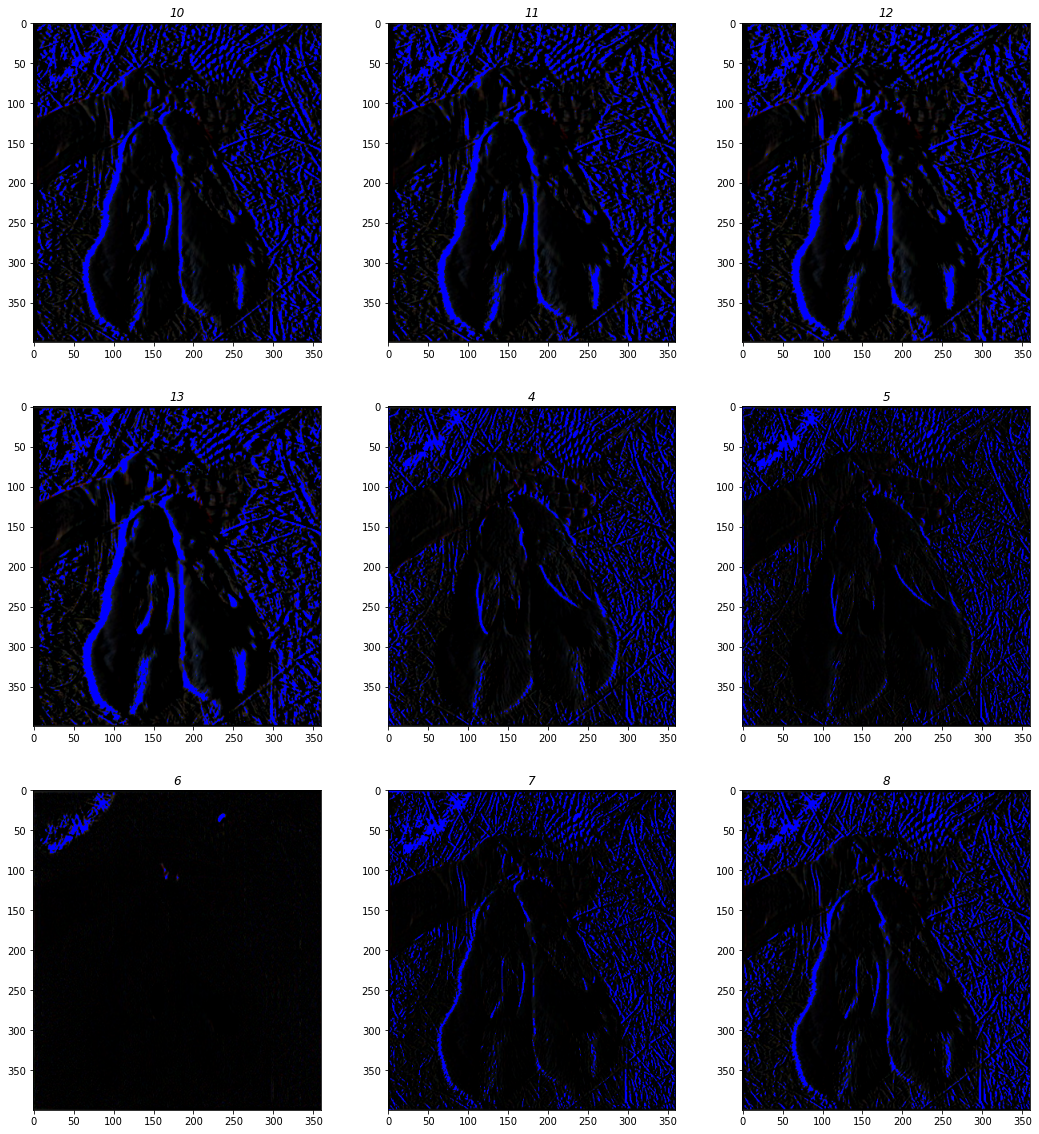

In [131]:
original = screen_array[515:915, 60:420, :]

fig=plt.figure(figsize=(18, 20))
data=np.arange(900).reshape((30,30))
for n, i in enumerate([10, 11, 12, 13,4,5,6,7,8]):
    ax=fig.add_subplot(3,3,n+1)   
    ax.set_title("{}".format(i), fontstyle='italic')     
    copy = screen_array[515:915, 490-i:850-i, :]
    difference = cv2.subtract(original, copy)

    # color the mask red
    Conv_hsv_Gray = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(Conv_hsv_Gray, 0, 255,cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)
    difference[mask != 255] = [0, 0, 255]

    plt.imshow(difference);
plt.show()

(410, 390, 3)


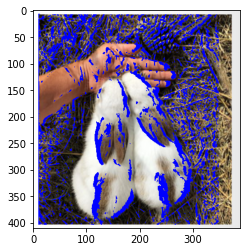

In [77]:
original = screen_array[510:920, 50:440, :]
print(original.shape)
plt.imshow(original);

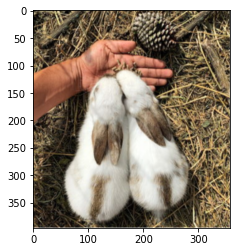

In [92]:
from PIL import Image, ImageChops

def trim(im):
    im = Image.fromarray(im)
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)

im = trim(copy)
plt.imshow(im);

In [93]:
I = np.asarray(im)
I.shape

(396, 358, 3)

In [40]:
#img=cv2.resize(img,(width,height)) #resize image
#roi = img[y1:y2, x1:x2] #region of interest i.e where the rectangles will be
gray = cv2.cvtColor(cropped_region, cv2.COLOR_BGR2GRAY) #convert roi into gray
Blur=cv2.GaussianBlur(gray,(5,5),1) #apply blur to roi
Canny=cv2.Canny(Blur,10,50) #apply canny to roi

In [41]:
#Find my contours
contours =cv2.findContours(Canny,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)[0]

In [49]:
#Loop through my contours to find rectangles and put them in a list, so i can view them individually later.
cntrRect = []
for i in contours:
        epsilon = 0.05*cv2.arcLength(i,True)
        approx = cv2.approxPolyDP(i,epsilon,True)
        if len(approx) == 4:
            cv2.drawContours(cropped_region,cntrRect,-1,(0,255,0),2)
            cv2.imshow('Roi Rect ONLY',cropped_region)
            cntrRect.append(approx)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [44]:
gray_img = cv2.cvtColor(cropped_region, cv2.COLOR_BGR2GRAY)
thresh_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

cnts = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for cnt in cnts:
    approx = cv2.contourArea(cnt)
    print(cv2.contourArea(cnt))
    print(approx)

cv2.imshow('image', cropped_region)
cv2.imshow('Binary',thresh_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'contourArea'
> Overload resolution failed:
>  - contour is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'contour'


In [47]:
frame = cropped_region
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7, 7), 0.5)
edge = cv2.Canny(blur, 0, 50, 3)

contours, hierarchy = cv2.findContours(edge, cv2.RETR_EXTERNAL,
                                       cv2.CHAIN_APPROX_SIMPLE)


for contour, hier in zip(contours, hierarchy):
    (x,y,w,h) = cv2.boundingRect(contour)
    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(frame, ('width = {}, height = {}'.format(w, h)),
                (x+30, y+30),
                cv2.FONT_HERSHEY_SIMPLEX,
                1,
                (0, 255, 0),
                2,
                cv2.LINE_AA)

cv2.imshow('Measure Size', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

113

In [116]:
original = screen_array[515:915, 60:420, :]
copy = screen_array[515:915, 490:850, :]

In [ ]:
img_rgb = cv2.imread('mario.png')
template = cv2.imread('mario_coin.png')
w, h = template.shape[:-1]

res = cv2.matchTemplate(img_rgb, template, cv2.TM_CCOEFF_NORMED)
threshold = .8
loc = np.where(res >= threshold)
for pt in zip(*loc[::-1]):  # Switch collumns and rows
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

cv2.imwrite('result.png', img_rgb)